In [1]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 9/9 [00:20<00:00,  2.32s/it]


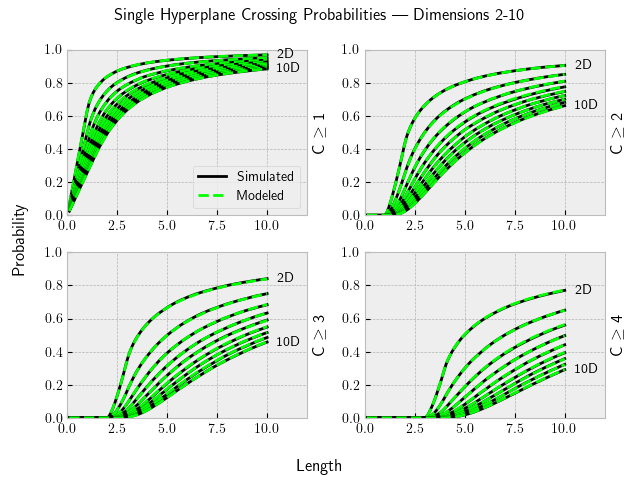

In [2]:
# Probability C>=c given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 11, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,2)
axs = axes.reshape(-1)
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob(samples, dim, lengths, c, hyperplanes, spacing, "ge")
        ax.plot(lengths, sim_probs, "k")

        probabilities = modeling.prob_of_crossing_single_set(lengths, dim, c, spacing[0])
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\ge$ ' + f"{c}")
        ax.yaxis.set_label_position("right")

        if dim == dims[0] or dim == dims[-1]:
            ax.text(lengths[-1]+ 0.5, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
    ax.set_xlim([0, 12])
    ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-10")
plt.tight_layout()

100%|██████████| 9/9 [00:02<00:00,  4.08it/s]


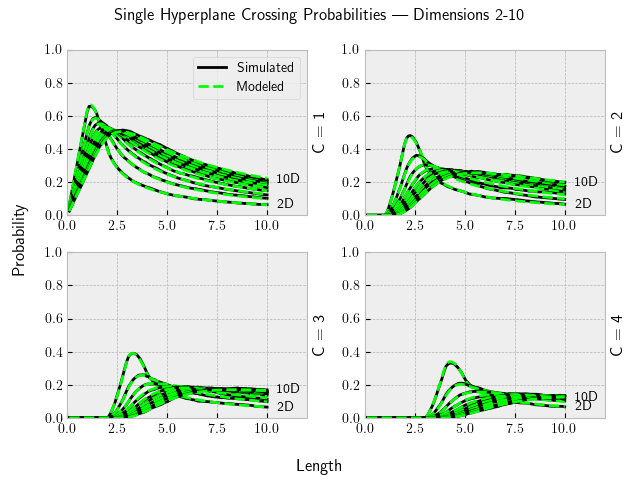

In [21]:
# Probability C=c given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 11, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,2)
axs = axes.reshape(-1)
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob(samples, dim, lengths, c, hyperplanes, spacing, "e")
        ax.plot(lengths, sim_probs, "k")

        probabilities = (modeling.prob_of_crossing_single_set(lengths, dim, c, spacing[0])
                         - modeling.prob_of_crossing_single_set(lengths, dim, c+1, spacing[0]))
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C = ' + f"{c}")
        ax.yaxis.set_label_position("right")

        if dim == dims[0] or dim == dims[-1]:
            ax.text(lengths[-1]+ 0.5, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
    ax.set_xlim([0, 12])
    ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-10")
plt.tight_layout()

100%|██████████| 9/9 [00:21<00:00,  2.36s/it]


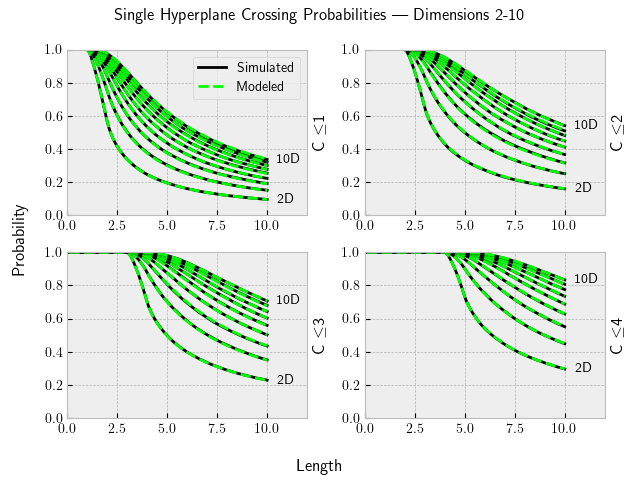

In [19]:
# Probability C=c given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 11, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,2)
axs = axes.reshape(-1)
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob(samples, dim, lengths, c, hyperplanes, spacing, "le")
        ax.plot(lengths, sim_probs, "k")

        probabilities = 1 - modeling.prob_of_crossing_single_set(lengths, dim, c+1, spacing[0])
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\le$' + f"{c}")
        ax.yaxis.set_label_position("right")

        if dim == dims[0] or dim == dims[-1]:
            ax.text(lengths[-1]+ 0.5, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
    ax.set_xlim([0, 12])
    ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-10")
plt.tight_layout()

100%|██████████| 5/5 [00:00<00:00,  6.34it/s]


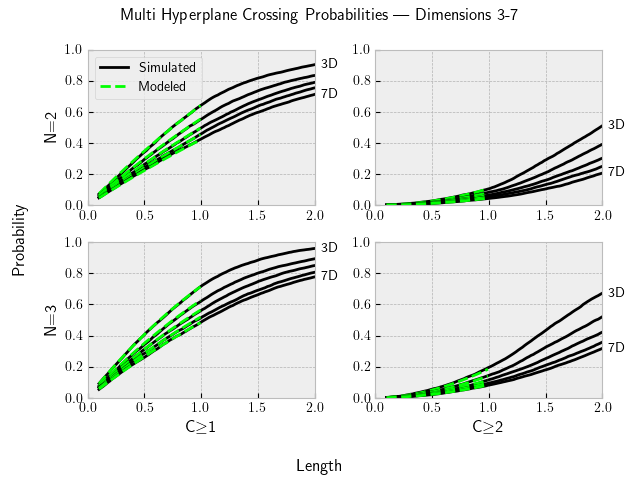

In [18]:
# Probability Given multiple sets of hyperplanes, greater than or equal

samples = 10000
lengths = np.linspace(0.1, 2, 101)
Cs = np.arange(1,3)
Ns = np.arange(2,4)
dims = np.arange(3, 8, 1)

plt.rc('text', usetex=True)
fig, axes = plt.subplots(len(Cs),len(Ns))
for N, axs in zip(Ns, axes):
    for C, ax in zip(Cs, axs):
        for dim in tqdm(dims):
            spacing = np.arange(dim)+1
            sim_probs = sampling.get_sim_prob(samples, dim, lengths, C, N, spacing, "ge")
            ax.plot(lengths, sim_probs, "k")

            r_s = lengths[lengths<=min(spacing)]
            probabilities = modeling.prob_of_crossing_small_r_ge(r_s, dim, C, N, spacing)
            ax.plot(r_s, probabilities, "--", color=(0,1,0))

            if dim == dims[0] or dim == dims[-1]:
                ax.text(lengths[-1]+ 0.05, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")
        if C == Cs[0]:
            ax.set_ylabel(f"N={N}")
        if N == Ns[-1]:
            ax.set_xlabel(r'C$\ge$' + f"{C}")

        if C == Cs[0] and N == Ns[0]:
            ax.legend(["Simulated", "Modeled"])
        ax.set_xlim([0, lengths[-1]])
        ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle(f"Multi Hyperplane Crossing Probabilities | Dimensions {dims[0]}-{dims[-1]}")
plt.tight_layout()


100%|██████████| 5/5 [00:00<00:00,  6.15it/s]


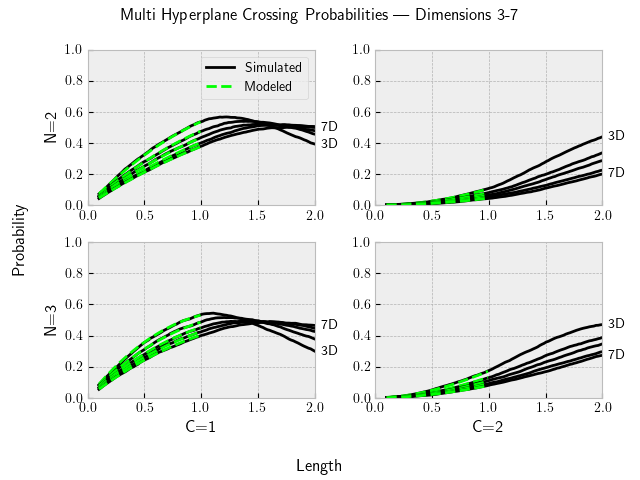

In [19]:
# Probability Given multiple sets of hyperplanes, greater than or equal

samples = 10000
lengths = np.linspace(0.1, 2, 101)
Cs = np.arange(1,3)
Ns = np.arange(2,4)
dims = np.arange(3, 8, 1)

plt.rc('text', usetex=True)
fig, axes = plt.subplots(len(Cs),len(Ns))
for N, axs in zip(Ns, axes):
    for C, ax in zip(Cs, axs):
        for dim in tqdm(dims):
            spacing = np.arange(dim)+1
            sim_probs = sampling.get_sim_prob(samples, dim, lengths, C, N, spacing, "e")
            ax.plot(lengths, sim_probs, "k")

            r_s = lengths[lengths<=min(spacing)]
            probabilities = (modeling.prob_of_crossing_small_r_ge(r_s, dim, C, N, spacing)
                             - modeling.prob_of_crossing_small_r_ge(r_s, dim, C+1, N, spacing))
            ax.plot(r_s, probabilities, "--", color=(0,1,0))

            if dim == dims[0] or dim == dims[-1]:
                ax.text(lengths[-1]+ 0.05, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")
        if C == Cs[0]:
            ax.set_ylabel(f"N={N}")
        if N == Ns[-1]:
            ax.set_xlabel(r'C=' + f"{C}")

        if C == Cs[0] and N == Ns[0]:
            ax.legend(["Simulated", "Modeled"])
        ax.set_xlim([0, lengths[-1]])
        ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle(f"Multi Hyperplane Crossing Probabilities | Dimensions {dims[0]}-{dims[-1]}")
plt.tight_layout()

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


Text(0.5, 1.0, 'Multi-hyperplane Crossing Probability')

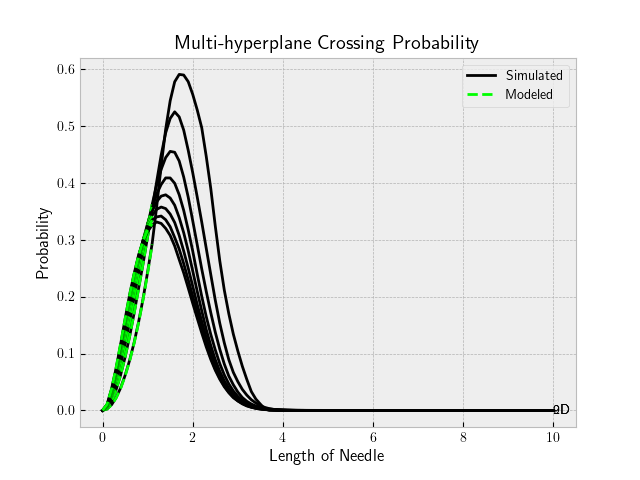

In [4]:
# Probability Given multiple sets of hyperplanes, exact
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
c = 2

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):
    spacing = (np.arange(dim)+11)/10
    hyperplanes = max(1, dim)

    sim_probs = sampling.get_sim_prob_e(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    r_s = lengths[lengths<=min(spacing)]
    modeled_prob = modeling.prob_of_crossing_small_r(r_s, dim, c, hyperplanes, spacing)
    ax.plot(r_s, modeled_prob, "--", color=(0, 1, 0))

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
ax.set_title("Multi-hyperplane Crossing Probability")

1.01 1.5 1.5


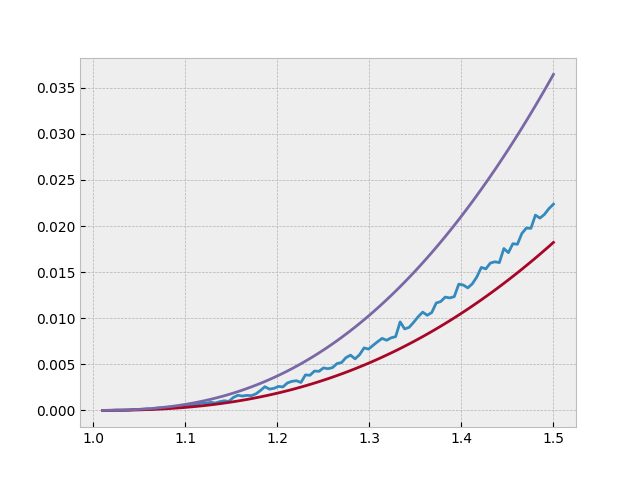

In [9]:
importlib.reload(sampling)
# multi-spacing debug
# np.random.seed(2)
def xi(m, gamma_a, gamma_b=0):
    """Calculate the integral from arcsin(gamma_b) to arccos(gamma_a) of sin^m(x)"""
    if m%2 == 0:
        g = 2/np.pi * (np.arccos(gamma_a) - np.arcsin(gamma_b))
    else:
        g = (1 - gamma_b**2)**0.5 - gamma_a
    loop_sum = np.sum([spec.beta((m+2-2*i)/2, 0.5)/np.pi * (gamma_a*(1-gamma_a**2)**((m+1-2*i)/2) - gamma_b**(m+1-2*i)*(1-gamma_b**2)**0.5)
                    for i in range(1, m//2+1)])
    integral = spec.beta((m+1)/2, 0.5)/2*(g-loop_sum)
    if integral<0:
        raise ValueError("Sin Integral is Negative???")
    return integral

def short_int(count1, count2, length, spacing):
    if length < spacing[0]*(count1-1):
        return 0
    if length < spacing[1]*(count2-1):
        return 0
    dim = len(spacing)
    gamma1 = 0
    gamma2 = 0
    gamma2r = 0
    if count1 > 0:
        gamma1 = spacing[0]*(count1-1)/length

    if count2 > 0:
        gamma2 = spacing[1]*(count2-1)/length
        gamma2r = gamma2/((1-gamma1**2)**0.5)

    model_prob = 2**2*length**2*spec.gamma(dim/2) / (np.pi*spacing[0]*spacing[1]*spec.gamma((dim-2)/2)) * (
        gamma1*gamma2 * xi(dim-2, gamma1, gamma2) * xi(dim-3, gamma2r) # curve to linear up
        - gamma1 * xi(dim-1, gamma1, gamma2) * ((1-gamma2r**2)**((dim-2)/2)) / (dim-2) # curve down
        - gamma2 * xi(dim-3, gamma2r) * ((1-gamma1**2)**((dim-1)/2) - gamma2**(dim-1)) / (dim-1) # curve down
        + ((1-gamma1**2)**(dim/2) - gamma2**dim) * (1-gamma2r**2)**((dim-2)/2) / (dim * (dim-2)) # curve up
    )
    return model_prob

def short_int_correction(gamma1h, gamma1l, gamma2h):
    model_prob = 2**2*length**2*spec.gamma(dim/2)/(np.pi*spacing[0]*spacing[1]*spec.gamma((dim-2)/2))*(
        gamma1h*gamma1l*xi(dim-2, gamma1h, gamma1l)*xi(dim-3, gamma2h)
        - gamma1h*xi(dim-1, gamma1h, gamma1l)*(1-gamma2h**2)**((dim-2)/2)/(dim-2)
        - gamma1l*xi(dim-3, gamma2h)*((1-gamma1h**2)**((dim-1)/2) - gamma1l**(dim-1))/(dim-1)
        + ((1-gamma1h**2)**(dim/2) - gamma1l**dim)*(1-gamma2h**2)**((dim-2)/2)/dim/(dim-2)
    )
    return model_prob

sim_probs = []
mod_probs_short = []
mod_probs_med = []
mod_probs_long = []

samples = 100000
dim = 3
hyperplanes = 2
N = hyperplanes
spacing = np.array([1.5,1,1])
c1 = 1
c2 = 2

lengths = np.linspace(((spacing[0]*(c1-1))**2 + (spacing[1]*(c2-1))**2)**0.5+0.01, spacing[0]*c1, 101)
print(lengths[0], lengths[-1], spacing[0]*c1)

for length in lengths:

    xs = np.random.random((samples, dim))*spacing[None, :]
    hypersphere = sampling.get_samples_gaussian(samples, dim)
    ys = xs + length * hypersphere

    # prob that x1 direction has at least c1 intersections and x2 direction has at least c2 intersections
    intersections = 0
    for y in ys:
        if (y[0]>spacing[0]*c1 or y[0]<-spacing[0]*(c1-1)) and (y[1]>spacing[1]*c2 or y[1]<-spacing[1]*(c2-1)):
            intersections += 1
    probability = intersections / samples
    sim_probs.append(probability)
    # print(probability)

    # print()
    short_needle = short_int(c1, c2, length, spacing)
    mod_probs_short.append(short_needle)
    # print(short_needle)
    # print()
    # gamma1h = spacing[0]*(c1)/length
    # gamma1l = spacing[1]*(c2-1)/length
    # gamma2h = gamma1l/(1-gamma1h**2)**0.5
    # print(gamma1h, gamma1l, gamma2h)
    # correction1 = short_int_correction(gamma1h, gamma1l, gamma2h)
    # mod_probs_med.append(short_needle -correction1)

    # gamma1h = spacing[0]*(c1-1)/length
    # gamma1l = spacing[1]*(c2)/length
    # gamma2h = gamma1l/(1-gamma1h**2)**0.5
    # correction2 = short_int_correction(gamma1h, gamma1l, gamma2h)

    # gamma1h = spacing[0]*(c1)/length
    # gamma1l = spacing[1]*(c2)/length
    # gamma2h = gamma1l/(1-gamma1h**2)**0.5
    # correction3 = short_int_correction(gamma1h, gamma1l, gamma2h)
    # mod_probs_long.append(short_needle -correction1 - correction2 + correction3)
# BIG DIM CAUSES NEGATIVE PROB
fig, ax = plt.subplots()
ax.plot(lengths, sim_probs)
ax.plot(lengths, np.array(mod_probs_short))
ax.plot(lengths, 2*np.array(mod_probs_short))
# ax.plot(lengths, mod_probs_med)
# ax.plot(lengths, mod_probs_long)
# ax.set_ylim([-0.1, 1.1])

C:\Users\Alex\AppData\Local\Temp\ipykernel_19884\1011450864.py:14: RuntimeWarning: invalid value encountered in arccos
  ax[1].plot(phi1, np.nan_to_num(np.arccos(s2*(c2)/(r*np.sin(phi1)))))
c:\Users\Alex\Documents\_projTech\20 Buffon Extension\buffon_extension\venv\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


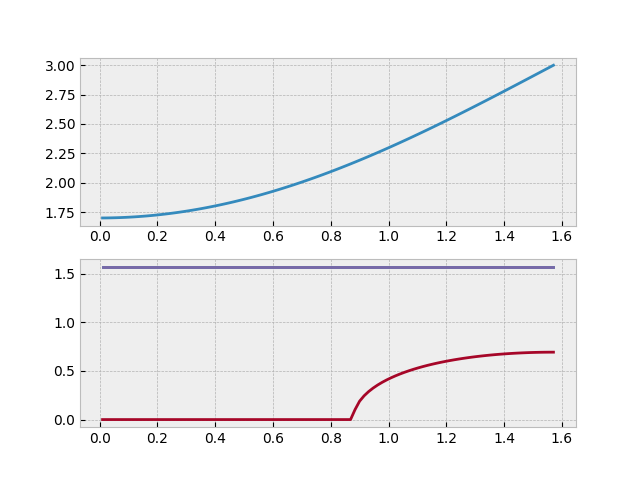

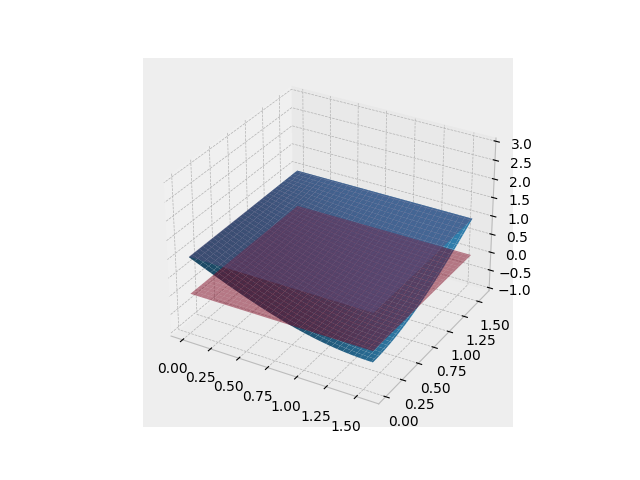

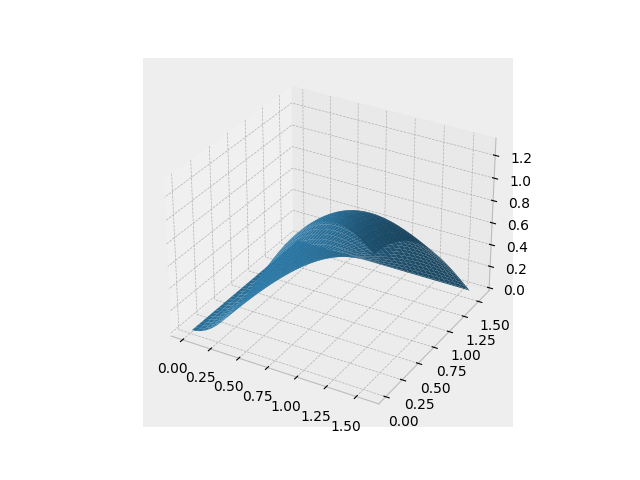

In [11]:
s1 = 1.5
s2 = 1
c2 = 1
c1 = 2
r = 1.3
gamma1 = s1*(c1-1)/r
gamma2 = s2*(c2-1)/r
dim = 3

fig, ax = plt.subplots(2)
phi1 = np.linspace(0.01, np.pi/2, 101)
phi2 = np.linspace(0.01, np.pi/2, 101)
ax[1].plot(phi1, np.nan_to_num(np.arccos(s2*(c2-1)/(r*np.sin(phi1)))))
ax[1].plot(phi1, np.nan_to_num(np.arccos(s2*(c2)/(r*np.sin(phi1)))))
ax[1].plot(phi1, np.arccos((s2*(c2-1)/(r*(1-gamma1**2)**0.5)))*np.ones_like(phi1))
ax[0].plot(phi1, s1*c1-r*np.cos(phi1))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
phi1, phi2 = np.meshgrid(phi1, phi2)
x_2 = s2*c2 -r*np.sin(phi1)*np.cos(phi2)

surf = ax.plot_surface(phi1, phi2, x_2)
base = ax.plot_surface(phi1, phi2, 0*phi1, alpha=0.5)
base1 = ax.plot_surface(phi1, phi2, 0*phi1+s2, alpha=0.5)
ax.set_zlim(-s2, 3*s2)

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
z = (gamma1 + np.cos(phi1))*(gamma2 + np.sin(phi1)*np.cos(phi2))*np.sin(phi1)**(dim-2)*np.sin(phi2)**(dim-3)
surf = ax.plot_surface(phi1, phi2, z)


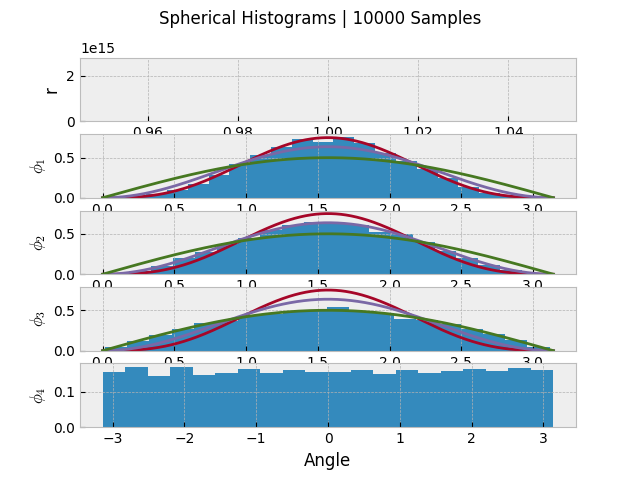

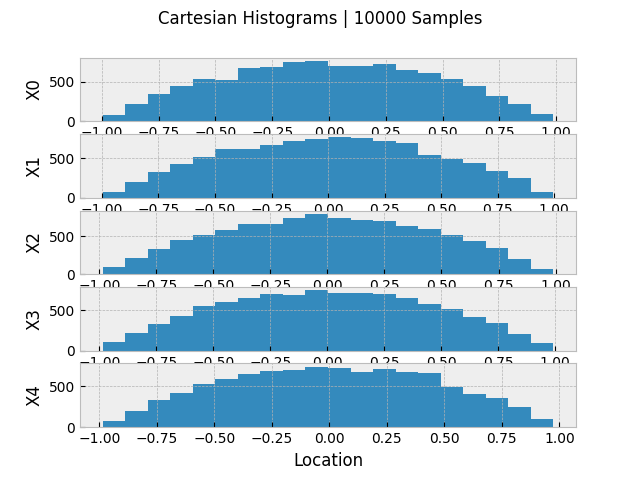

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)